# 探索性数据集分析（EDA）
- Exploratory Data Analysis, EDA
- 1.数据属性分布分析(概率密度分析/是否呈现正态分布)
- 2.数据属性与Target之间的相关性[correlation]
- 3.缺失属性相关性分析--进行合理的填充
- 4.构造属性和构造属性的相关性分析

## 相关性分析
- 相关性的取值范围：[-1 , +1]

- |r|>0.95 显著关系 显著的关系需要概率该特征是否与目标有很强的关联关系(报价和成交价,这样的话可能考虑去掉，否则会影响判断的走向)
- |r|>=0.8 强相关
- |r|>=0.5 中度相关
- 0.5>=|r|>=0.3 弱相关 (待挖掘，可以尝试去掉)部分数据与该特征可能存在较强的相关性(楼房屋顶和顶楼的成交价的关系)
- |r|<0.3 极弱相关

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("./data/data.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 直接列出各个特征之间的相关性
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [5]:
# 列出各个特征与SalePrice的相关性
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [6]:
# 列出中度相关以上的特征
corr_train = train.corr()['SalePrice']
corr_train[corr_train>0.5].sort_values()

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [7]:
corr_train[corr_train<0].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

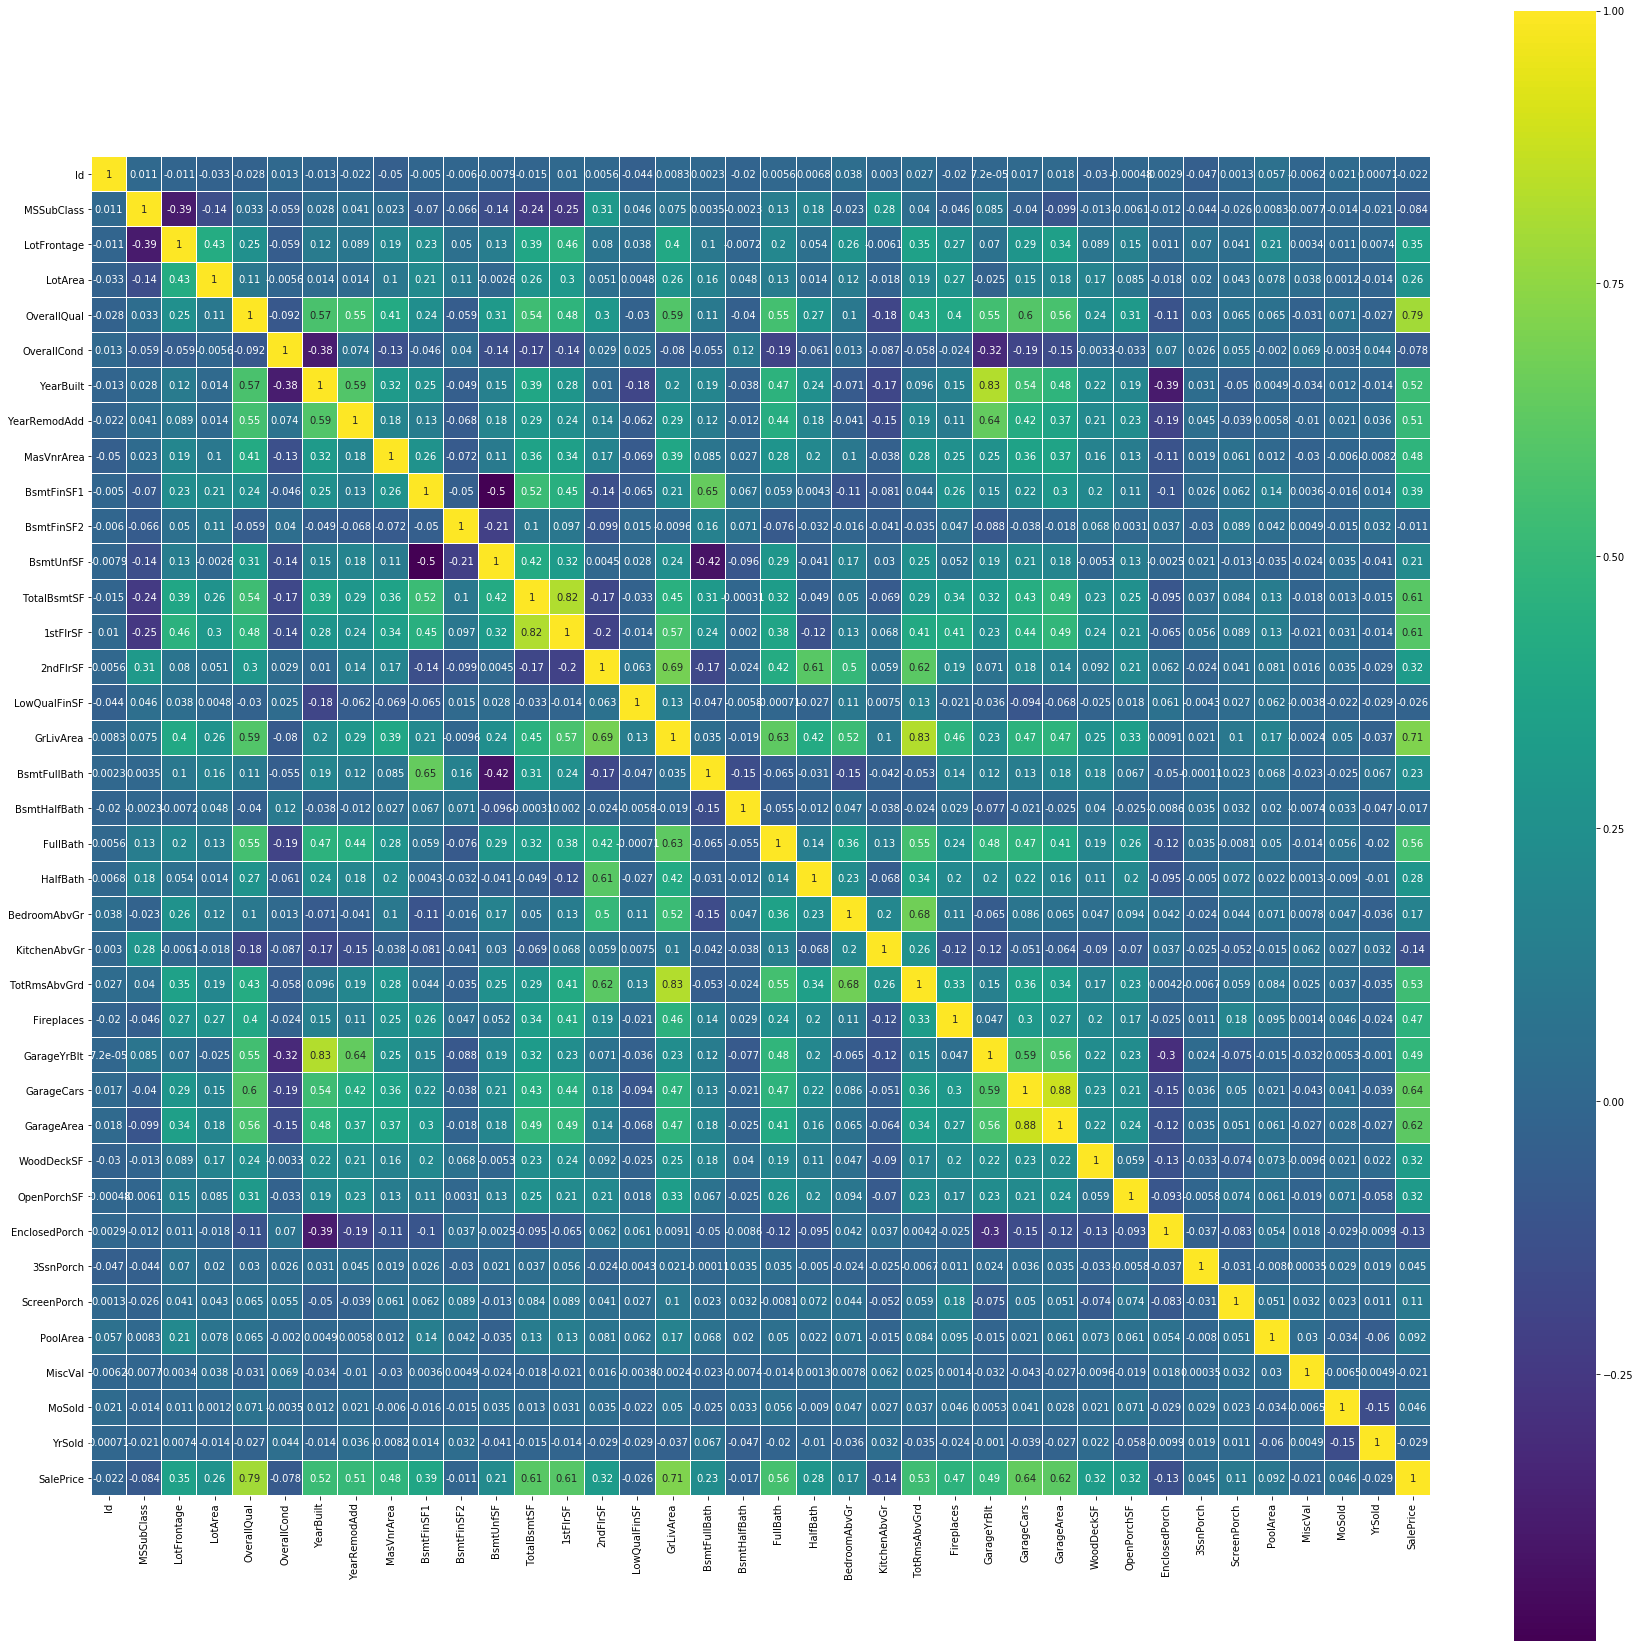

In [9]:
# 画出相关性图
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),linewidths=0.01,square=True,cmap='viridis',annot=True)

## 了解美国房子的关注点
- 在美国对房子比较关注的几个点，主要包括：
    - 一个房屋本身的相关物理特性相关特征（eg’OverallQual’）
    - 房屋面积相关的特征（eg. ‘TotalBsmtSF’）
    - 房屋位置相关变量（eg. 'Neighborhood'）

- 通过统计图观察特征与目标之间的关系。

## 1 OverallQual与SalePrice相关性分析

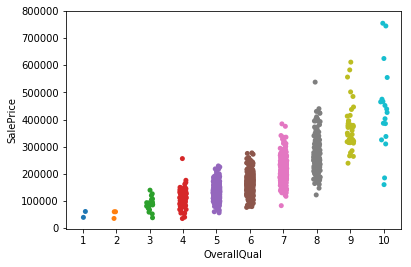

In [10]:
sns.stripplot("OverallQual", "SalePrice", data=train)

/Users/lyy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


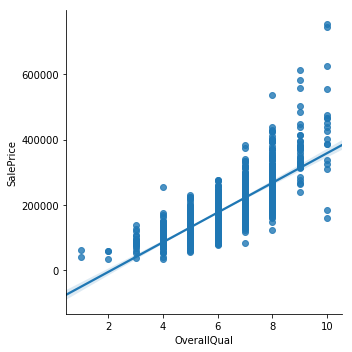

In [11]:
sns.lmplot("OverallQual", "SalePrice", data=train)

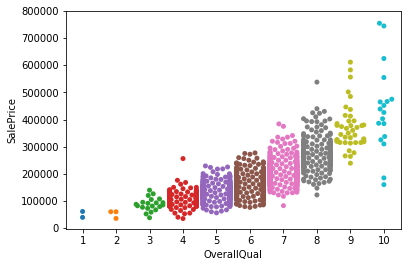

In [12]:
sns.swarmplot("OverallQual", "SalePrice", data=train)

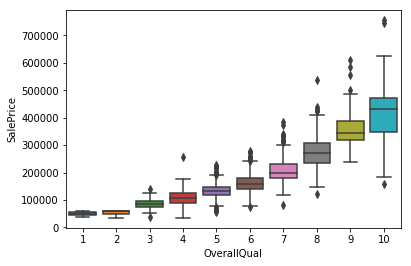

In [13]:
sns.boxplot("OverallQual", "SalePrice", data=train)

OverallQual与SalePrice总体呈正相关

## 2 GrLivArea与SalePrice相关性分析

In [14]:
train[['GrLivArea', 'SalePrice']].sort_values('GrLivArea')

,GrLivArea,SalePrice
533,334,39300
1100,438,60000
916,480,35311
29,520,68500
528,605,86000
696,616,89000
489,630,86000
434,630,81000
1449,630,92000
614,630,75500


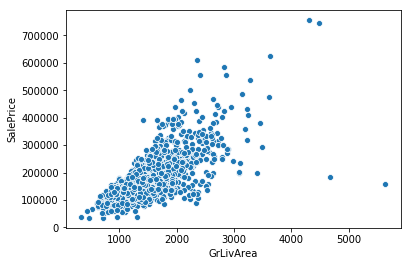

In [15]:
sns.scatterplot("GrLivArea", "SalePrice", data=train)

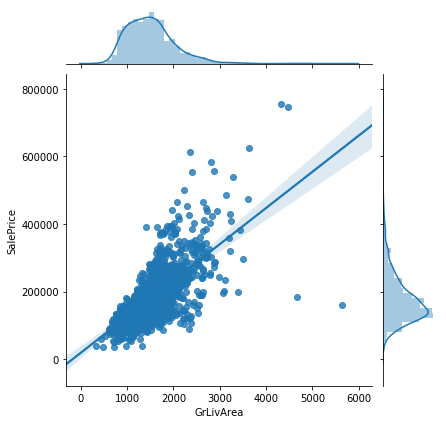

In [16]:
sns.jointplot('GrLivArea','SalePrice',data=train,kind='reg')

## 3 GarageCars与SalePrice相关性分析

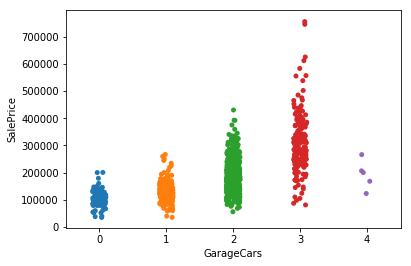

In [17]:
sns.stripplot("GarageCars", "SalePrice", data=train)

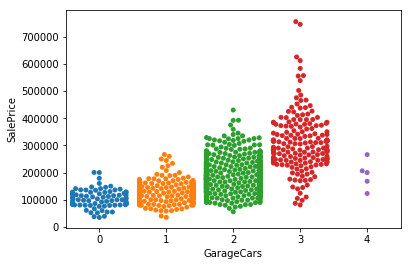

In [18]:
sns.swarmplot("GarageCars", "SalePrice", data=train)

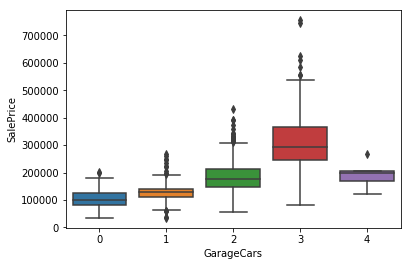

In [19]:
sns.boxplot(x="GarageCars", y="SalePrice", data=train)

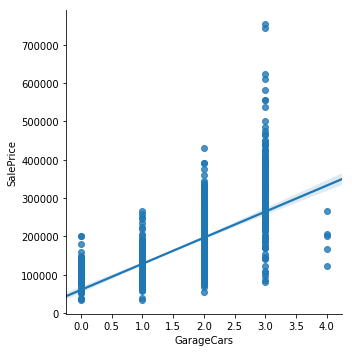

In [20]:
sns.lmplot("GarageCars", "SalePrice", data=train)

## 4 GarageArea与SalePrice相关性分析

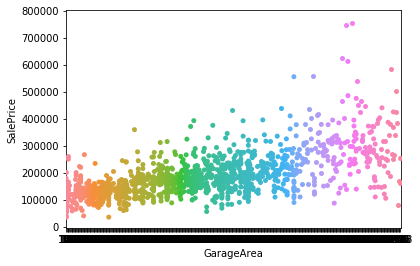

In [21]:
sns.stripplot("GarageArea", "SalePrice", data=train)

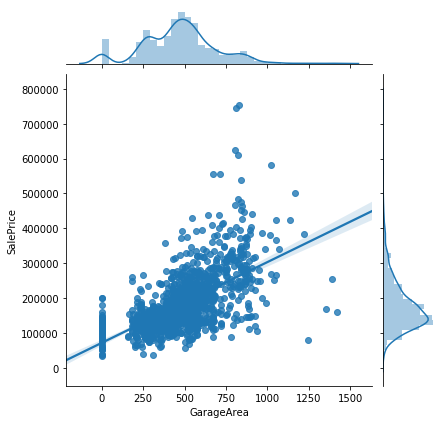

In [22]:
sns.jointplot("GarageArea", "SalePrice", data=train, kind="reg")

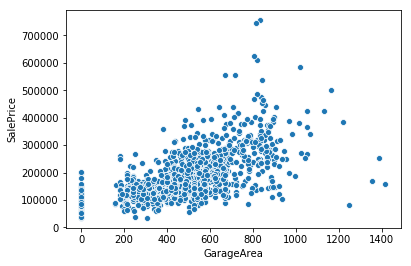

In [23]:
sns.scatterplot("GarageArea", "SalePrice", data=train)

## 5 TotalBsmtSF与SalePrice相关性分析

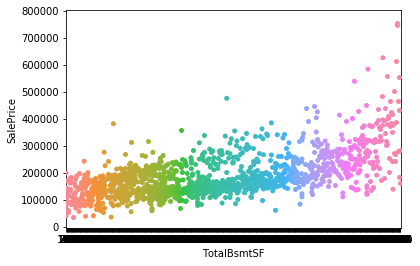

In [24]:
sns.stripplot("TotalBsmtSF", "SalePrice", data=train)

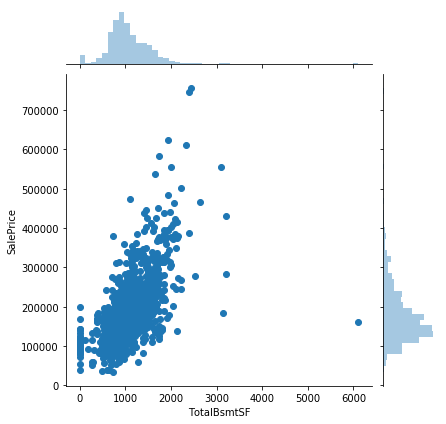

In [25]:
sns.jointplot("TotalBsmtSF", "SalePrice", data=train)

## 6 1stFlrSF与SalePrice相关性分析

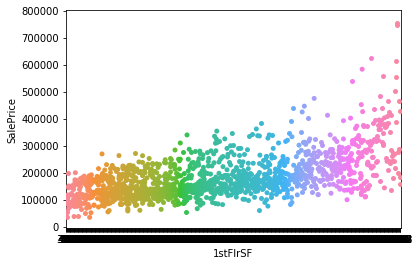

In [26]:
sns.stripplot("1stFlrSF", "SalePrice", data=train)

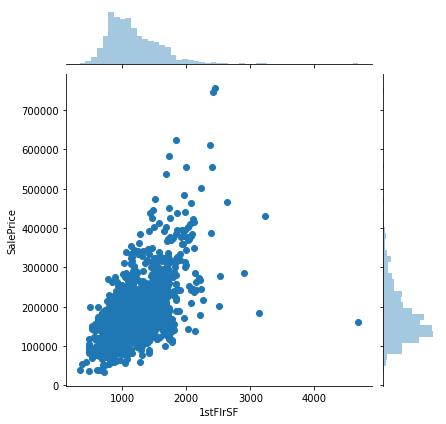

In [27]:
sns.jointplot("1stFlrSF", "SalePrice", data=train)

## 7 FullBath与SalePrice相关性分析

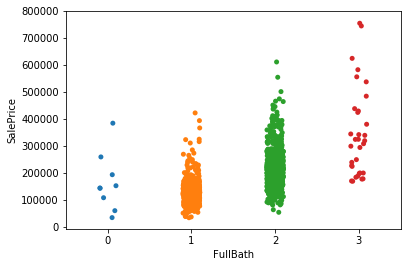

In [28]:
# FullBath是离散数据
sns.stripplot("FullBath", "SalePrice", data=train)

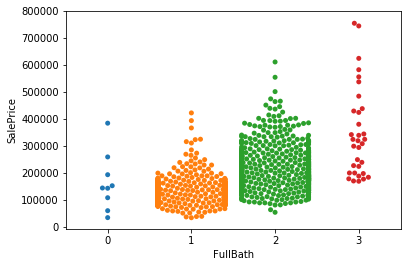

In [29]:
sns.swarmplot("FullBath", "SalePrice", data=train)

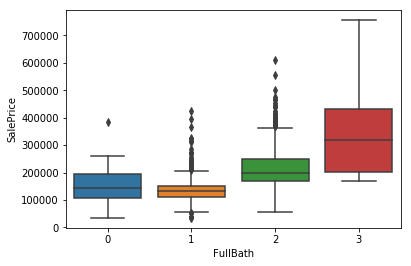

In [30]:
sns.boxplot("FullBath", "SalePrice", data=train)

## 8 TotRmsAbvGrd与SalePrice相关性分析

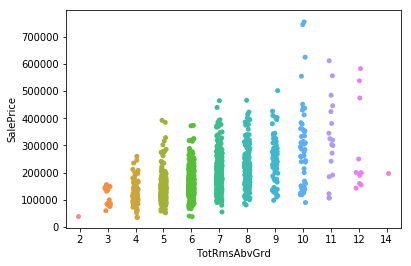

In [32]:
# train[["TotRmsAbvGrd", "SalePrice"]]
sns.stripplot("TotRmsAbvGrd", "SalePrice", data=train)

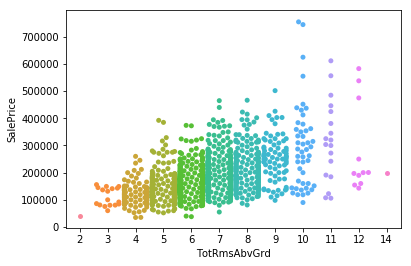

In [33]:
sns.swarmplot("TotRmsAbvGrd", "SalePrice", data=train)

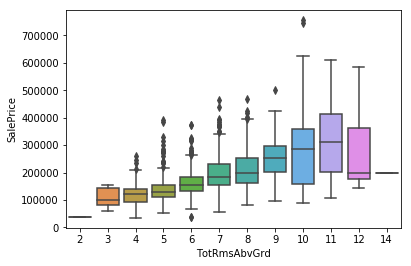

In [34]:
sns.boxplot("TotRmsAbvGrd", "SalePrice", data=train)

## 9 YearBuilt与SalePrice相关性分析

In [35]:
train[["YearBuilt", "SalePrice"]]

,YearBuilt,SalePrice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000
5,1993,143000
6,2004,307000
7,1973,200000
8,1931,129900
9,1939,118000


## 10 YearRemodAdd与SalePrice相关性分析

In [36]:
train[["YearRemodAdd", "SalePrice"]]

,YearRemodAdd,SalePrice
0,2003,208500
1,1976,181500
2,2002,223500
3,1970,140000
4,2000,250000
5,1995,143000
6,2005,307000
7,1973,200000
8,1950,129900
9,1950,118000
